# Trabalho Final de SGBD

*Nomes:* Arthur Sudbrack Ibarra, Felipe Grosze Nipper de Oliveira, Luiza Lencina, Miguel Torres de Castro.

## Informações do Dataset

**Nome:** Forest Fires Data Set

**Colunas:**
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

**Coluna alvo:** month

**Objetivo das análises:** O objetivo das análises que abaixo serão feitas é descobrir se é possível identificar com uma taxa considerável de precisão o mês em que uma queimada ocorreu
com base em atributos como a temperatura, velocidade dos ventos ou quantidade de chuva em mm, por exemplo. 

## Código em Python

In [203]:
# Importando recursos necessários.
import pandas as pd
import numpy as np

In [204]:
# Lendo o arquivo CSV.
df = pd.read_csv('forestfires.csv')
# Removendo colunas que não serão analisadas (coordenadas X e Y).
df = df.drop(columns = ['X', 'Y'])

In [205]:
# Exibindo na tela informações do arquivo lido.
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   517 non-null    object 
 1   day     517 non-null    object 
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 44.6+ KB


### Etapa de pré-processamento

In [206]:
from sklearn.model_selection import train_test_split

# Separando os conjuntos de dados de treino e teste.
df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 42)

# Separando a coluna alvo (month) do conjunto de treino.
df_treino_labels = df_treino['month'].copy()
df_treino = df_treino.drop(columns = 'month')

# Separando a coluna alvo (month) do conjunto de teste.
df_teste_labels = df_teste['month'].copy()
df_teste = df_teste.drop(columns = 'month')

In [207]:
# Imports necessários para o pré-processamento.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [208]:
# Classificando os atributos como numéricos ou categóricos.
nomes_atributos_numericos = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
nomes_atributos_categoricos = ['day']

In [209]:
# Lidando com dados ausentes.
pipeline_atr_numericos = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])
preproc_completo = ColumnTransformer([
    ('numericos', pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(), nomes_atributos_categoricos),
], sparse_threshold = 0)

In [210]:
# Pré-processamento do conjunto de treino.
X_treino = preproc_completo.fit_transform(df_treino)

# Pré-processamento do conjunto de teste.
X_teste = preproc_completo.transform(df_teste)

# Coluna alvo para os conjuntos de treino e teste.
y_treino = df_treino_labels.values
y_teste = df_teste_labels.values

## Regressão Lógica

In [211]:
# Importando o modelo de regressão lógica.
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo de regressão lógica.
log_reg = LogisticRegression(max_iter = 190) # Tentar mudar esse valor.

log_reg.fit(X_treino, y_treino)

# As possíveis classes disponíveis:
log_reg.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [212]:
# Probabilidade estimada pelo modelo de regressão linear.
y_probabilidade_reglog = log_reg.predict_proba(X_teste)
print("PROBABILIDADE ESTIMADA")
print(np.round(y_probabilidade_reglog, decimals = 2))
print()

# Previsões pelo modelo de regressão linear.
y_previsto_reglog = log_reg.predict(X_teste)
print("PREVISÕES")
print(y_previsto_reglog)
print()

# Array de booleans indicando acertos e erros do modelo.
acertos_reglog = y_previsto_reglog == y_teste

# Separando os erros (0) dos acertos (1) e mostrando quantidades.
valores_reglog, quantidades_reglog = np.unique(acertos_reglog, return_counts = True)
print("QUANTIDADE DE ERROS (0) E DE ACERTOS (1)")
print(np.asarray((valores_reglog, quantidades_reglog)))
print()

# Acurácia do modelo em %.
print("ACURÁCIA DO MODELO EM %")
print(str((quantidades_reglog[1]/y_teste.shape[0]) * 100) + ' %')

PROBABILIDADE ESTIMADA
[[0.08 0.01 0.   ... 0.   0.   0.  ]
 [0.   0.91 0.   ... 0.   0.   0.02]
 [0.   0.72 0.   ... 0.   0.   0.19]
 ...
 [0.   0.8  0.   ... 0.   0.   0.17]
 [0.   0.37 0.   ... 0.   0.03 0.45]
 [0.   0.06 0.   ... 0.   0.   0.94]]

PREVISÕES
['feb' 'aug' 'aug' 'sep' 'aug' 'mar' 'mar' 'sep' 'sep' 'aug' 'sep' 'sep'
 'aug' 'aug' 'sep' 'sep' 'aug' 'sep' 'aug' 'aug' 'mar' 'aug' 'dec' 'sep'
 'sep' 'aug' 'mar' 'aug' 'sep' 'sep' 'aug' 'sep' 'sep' 'sep' 'mar' 'jul'
 'aug' 'sep' 'aug' 'sep' 'aug' 'sep' 'aug' 'aug' 'aug' 'aug' 'mar' 'mar'
 'sep' 'aug' 'aug' 'may' 'aug' 'sep' 'aug' 'mar' 'oct' 'aug' 'sep' 'sep'
 'aug' 'aug' 'aug' 'aug' 'aug' 'sep' 'sep' 'aug' 'aug' 'mar' 'sep' 'sep'
 'aug' 'feb' 'mar' 'aug' 'aug' 'aug' 'aug' 'mar' 'feb' 'sep' 'sep' 'mar'
 'mar' 'feb' 'sep' 'sep' 'dec' 'sep' 'aug' 'mar' 'oct' 'aug' 'aug' 'sep'
 'mar' 'aug' 'aug' 'aug' 'feb' 'aug' 'sep' 'sep']

QUANTIDADE DE ERROS (0) E DE ACERTOS (1)
[[ 0  1]
 [23 81]]

ACURÁCIA DO MODELO EM %
77.88461538461539 

## Árvores de Decisão

In [213]:
# Importando o modelo de árvore de decisão.
from sklearn.tree import DecisionTreeClassifier

# Instanciando o modelo de árvore de decisão.
arvore = DecisionTreeClassifier(max_depth = 4) # 4 de max_depth é o valor ideal.

arvore.fit(X_treino, y_treino)

# As possíveis classes disponíveis:
arvore.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

### Probabilidade Estimada

In [214]:
# Probabilidade estimada pela árvore de decisão.
y_probabilidade_arvore = arvore.predict_proba(X_teste)
np.round(y_probabilidade_arvore, decimals = 2)

array([[0.  , 0.  , 0.26, ..., 0.04, 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , ..., 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

### Previsões

In [215]:
# Previsões da árvore de decisão.
y_previsto_arvore = arvore.predict(X_teste)
y_previsto_arvore

array(['jun', 'aug', 'aug', 'sep', 'sep', 'mar', 'mar', 'aug', 'sep',
       'aug', 'aug', 'sep', 'jul', 'aug', 'sep', 'oct', 'aug', 'sep',
       'aug', 'aug', 'mar', 'sep', 'jun', 'sep', 'sep', 'aug', 'feb',
       'aug', 'sep', 'sep', 'aug', 'sep', 'sep', 'sep', 'mar', 'jun',
       'aug', 'sep', 'aug', 'aug', 'aug', 'sep', 'aug', 'sep', 'aug',
       'jul', 'mar', 'feb', 'sep', 'jul', 'aug', 'sep', 'aug', 'aug',
       'sep', 'mar', 'oct', 'jul', 'sep', 'sep', 'aug', 'aug', 'aug',
       'aug', 'aug', 'sep', 'sep', 'aug', 'aug', 'mar', 'sep', 'sep',
       'jun', 'feb', 'jun', 'aug', 'aug', 'aug', 'aug', 'mar', 'feb',
       'sep', 'aug', 'mar', 'mar', 'feb', 'sep', 'sep', 'jun', 'oct',
       'aug', 'mar', 'oct', 'aug', 'aug', 'aug', 'mar', 'aug', 'aug',
       'aug', 'jun', 'aug', 'aug', 'sep'], dtype=object)

### Acurácia

In [216]:
from sklearn.metrics import accuracy_score

# Acurácia.
print("Acurácia: ", accuracy_score(y_teste,y_previsto_arvore))

Acurácia:  0.8846153846153846


### Visualização

[Text(2901.6, 1956.96, 'DC <= 0.472\ngini = 0.747\nsamples = 100.0%\nvalue = [0.017, 0.339, 0.015, 0.044, 0.002, 0.07, 0.031, 0.102\n0.002, 0.002, 0.031, 0.344]\nclass = sep'),
 Text(1450.8, 1522.0800000000002, 'DC <= -0.289\ngini = 0.737\nsamples = 52.1%\nvalue = [0.033, 0.442, 0.028, 0.084, 0.005, 0.13, 0.06, 0.195\n0.005, 0.005, 0.009, 0.005]\nclass = aug'),
 Text(892.8, 1087.2, 'DC <= -1.786\ngini = 0.782\nsamples = 27.8%\nvalue = [0.061, 0.026, 0.052, 0.157, 0.009, 0.2, 0.113, 0.365\n0.009, 0.009, 0.0, 0.0]\nclass = mar'),
 Text(446.4, 652.3200000000002, 'DMC <= -1.481\ngini = 0.545\nsamples = 16.5%\nvalue = [0.103, 0.015, 0.0, 0.25, 0.0, 0.0, 0.0, 0.618, 0.015\n0.0, 0.0, 0.0]\nclass = mar'),
 Text(223.2, 217.44000000000005, 'gini = 0.349\nsamples = 4.6%\nvalue = [0.158, 0.0, 0.0, 0.789, 0.0, 0.0, 0.0, 0.053, 0.0\n0.0, 0.0, 0.0]\nclass = feb'),
 Text(669.5999999999999, 217.44000000000005, 'gini = 0.291\nsamples = 11.9%\nvalue = [0.082, 0.02, 0.0, 0.041, 0.0, 0.0, 0.0, 0.837, 0.02\

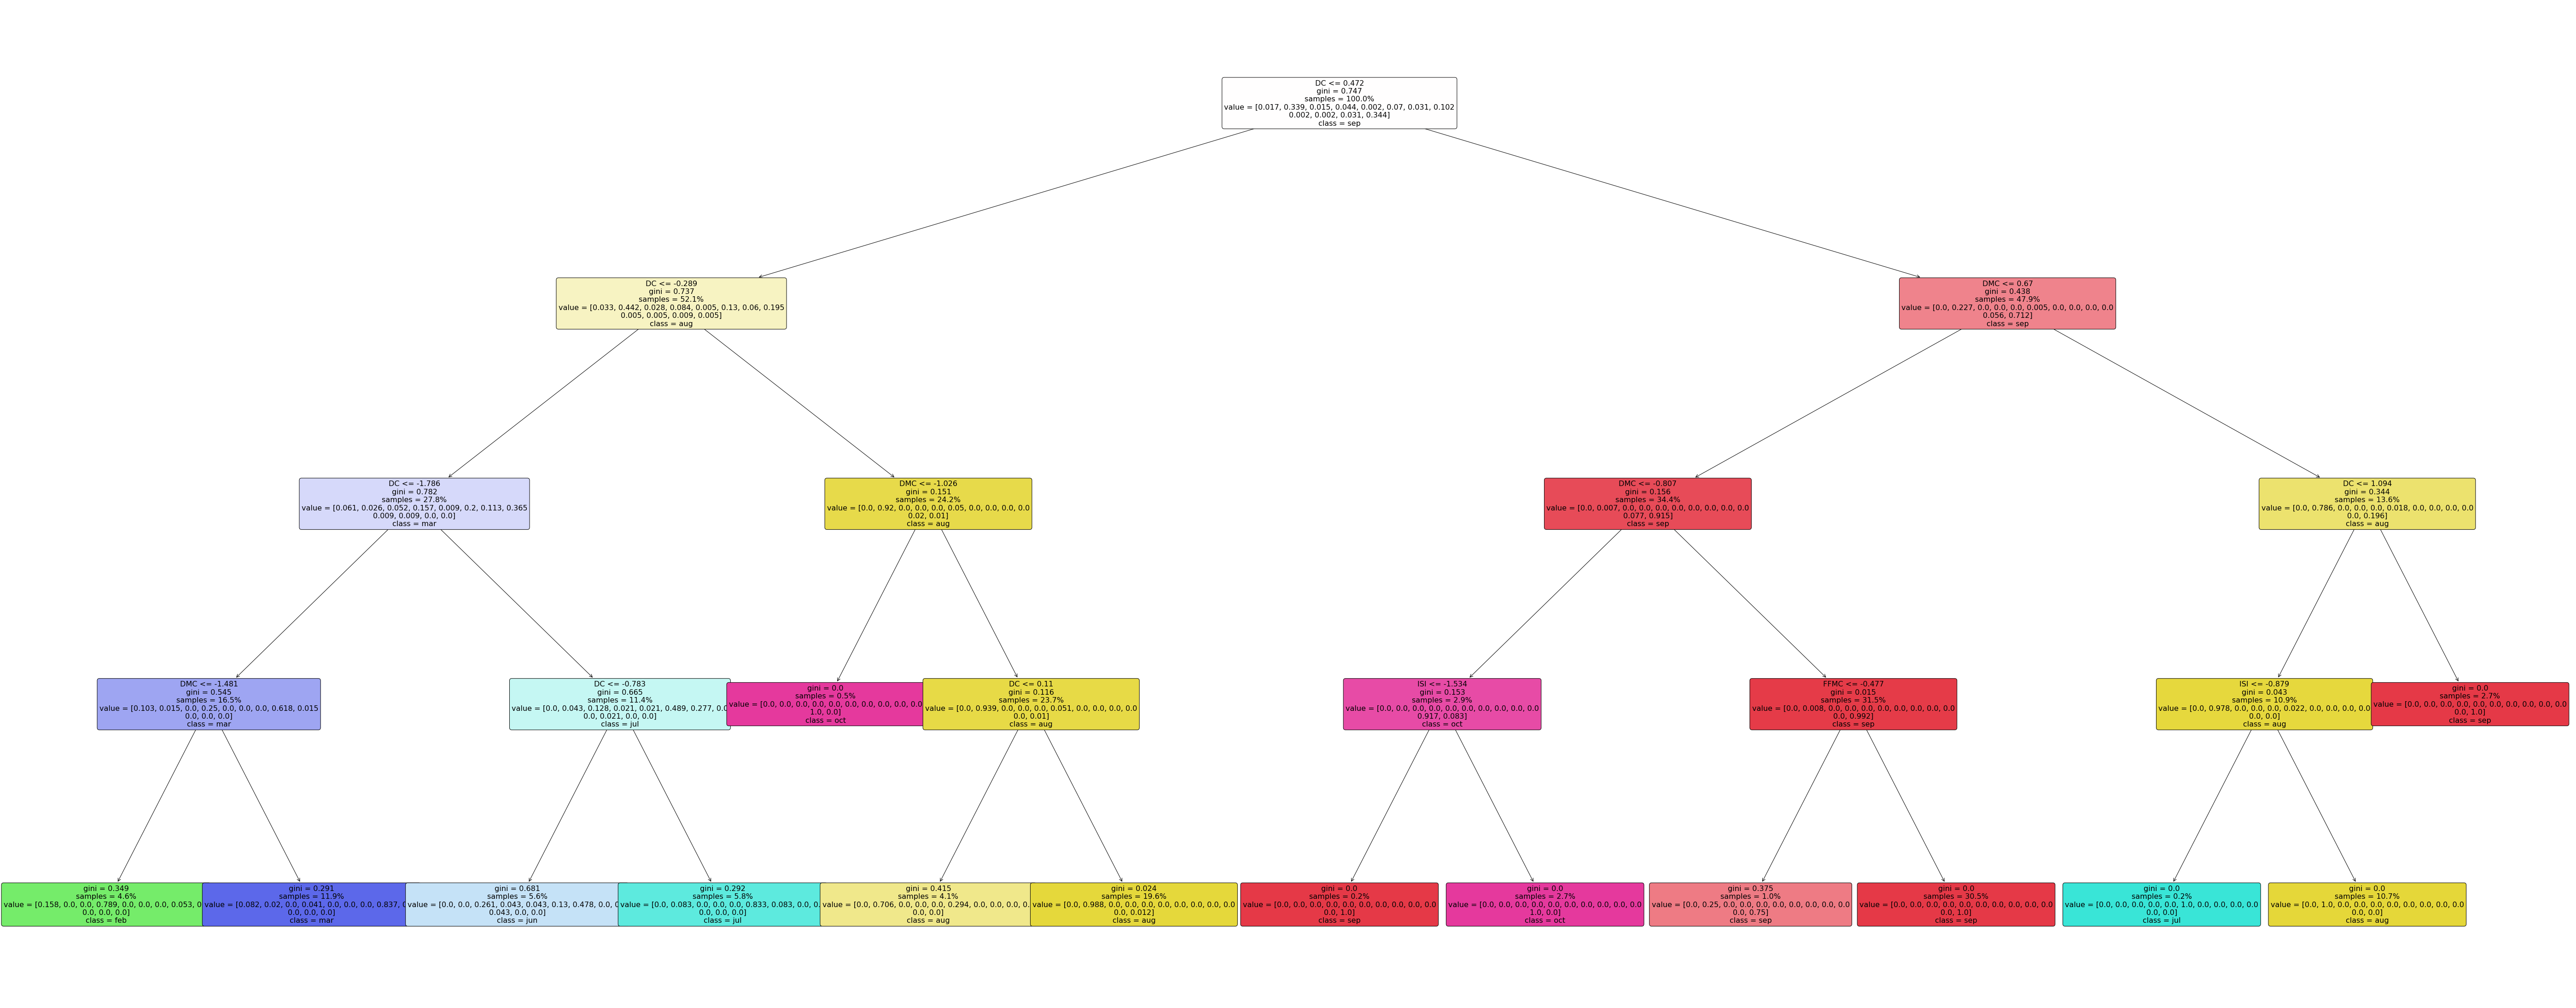

In [217]:
# Importando bibliotecas necessárias.
import matplotlib.pyplot as plt
from sklearn import tree

# Obtendo os nomes dos atributos.
nomes_atributos = np.append(nomes_atributos_numericos, preproc_completo.named_transformers_['categoricos'].get_feature_names())

plt.figure(figsize = (100, 40))

# Plotando a árvore.
tree.plot_tree(arvore,
               feature_names = nomes_atributos,
               class_names = arvore.classes_,
               rounded = True,
               filled = True,
               proportion = True,
               fontsize = 16)